In [1]:
import models
from models import (get_raw_data, get_rpm, normalizar_sinal)
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Equação para normalização

(ymax - ymin) / ( xmax - xmin) = (y - ymin) / (x - xmin)

x = ( (y - ymin) / (ymax - ymin) ) * (xmax - xmin) + xmin

y é o valor na escala física
x é o valor na escala normalizada

In [2]:
ordem = 1
pasta = f'database/dados_tratados/ordens_{ordem}'
arquivo = 'dados_extraidos_geral.csv'

In [3]:
dataframe = get_raw_data.GetData(pasta,arquivo).GetDataframe()

In [4]:
Objeto_normalizar = normalizar_sinal.NormalizarSinal(dataframe,ordem)

In [5]:
Objeto_normalizar.save_as_csv()

Arquivo salvo com sucesso!
database/dados_tratados/ordens_1/Dados_Normalizados.csv


In [6]:
pasta = f'database/dados_tratados/ordens_{ordem}'
arquivo = 'Dados_Normalizados.csv'

df_normal = get_raw_data.GetData(pasta,arquivo).GetDataframe()

In [7]:
df_normal

,rotacao_hz,maximo,rms,assimetria,curtose,fator_crista,soma_ball_fault,soma_outer_race,soma_rotacao_hz,soma_relativa_ball_fault,soma_relativa_outer_race,soma_relativa_rotacao_hz,sensor,defeito
0,0.054711,0.009545,0.021910,0.127253,0.044261,0.054624,0.002680,0.001916,0.001746,0.009152,0.006571,0.005995,0.0,normal
1,0.054711,0.009545,0.021947,0.127700,0.044343,0.054511,0.002767,0.002016,0.001901,0.009377,0.006858,0.006470,0.0,normal
2,0.054711,0.009545,0.021913,0.128246,0.044655,0.054615,0.003047,0.002085,0.001917,0.010261,0.007052,0.006491,0.0,normal
3,0.054711,0.009545,0.021898,0.127376,0.044411,0.054661,0.002641,0.002123,0.001815,0.008820,0.007109,0.006091,0.0,normal
4,0.054711,0.009545,0.021906,0.127553,0.044426,0.054637,0.002602,0.002142,0.001831,0.008636,0.007128,0.006104,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165355,0.401216,0.120000,0.169677,0.019870,0.023770,0.096196,0.043860,0.039171,0.277521,0.025922,0.023149,0.164079,1.0,outer_race_alto
165356,0.401216,0.120000,0.169710,0.020616,0.024080,0.096174,0.036424,0.034910,0.279789,0.021577,0.020679,0.165819,1.0,outer_race_alto
165357,0.401216,0.120000,0.169415,0.022675,0.024260,0.096370,0.045257,0.040489,0.280362,0.026684,0.023872,0.165367,1.0,outer_race_alto
165358,0.401216,0.120000,0.169514,0.023521,0.024359,0.096304,0.038529,0.035640,0.283990,0.022695,0.020992,0.167354,1.0,outer_race_alto


In [11]:
coluna_filtro = df_normal.columns[-1]
df_filtrada = df_normal[df_normal[coluna_filtro]=='normal']

filtro_sensor = list(models.sensores)[0]
df_filtrada = df_normal[df_normal['sensor']==filtro_sensor]
filtro_sensor

'rolamento_interno_radial1'

In [9]:
coluna = df_filtrada.columns[7]

df_coluna = df_filtrada[coluna]
df_coluna

Series([], Name: soma_outer_race, dtype: float64)

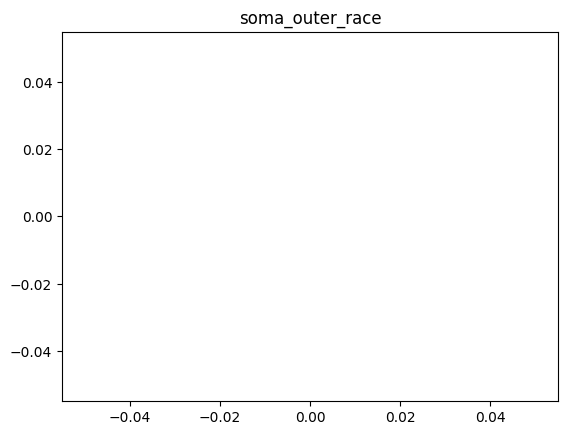

In [10]:
plt.plot(range(len(df_coluna)),df_coluna)
plt.title(coluna)
plt.show()